general
[('University of California, Berkeley', 0.3600148480662076), ('Massachusetts Institute of Technology', 0.35761146501690444), ('University of Illinois Urbana-Champaign', 0.18988109141616188), ('University of Massachusetts Amherst', 0.04643071818518267), ('Ohio State University', 0.04606187731554394)]
edu_to_edu
[('Massachusetts Institute of Technology', 0.30004599062724074), ('University of California, Berkeley', 0.3000459906272407), ('University of Illinois Urbana-Champaign', 0.2547502911674731), ('Ohio State University', 0.10901314926471287), ('University of Massachusetts Amherst', 0.03614457831333275)]
work_to_work
[('Massachusetts Institute of Technology', 0.4086824370307281), ('University of California, Berkeley', 0.34511808933101984), ('University of Illinois Urbana-Champaign', 0.12759275447456256), ('University of Massachusetts Amherst', 0.0824621408504367), ('Ohio State University', 0.03614457831325302)]
edu_to_work
[('University of California, Berkeley', 0.3839964559145

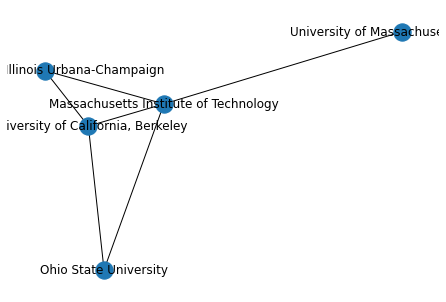

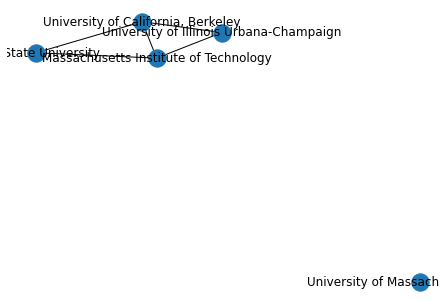

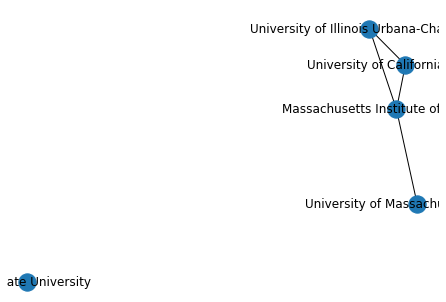

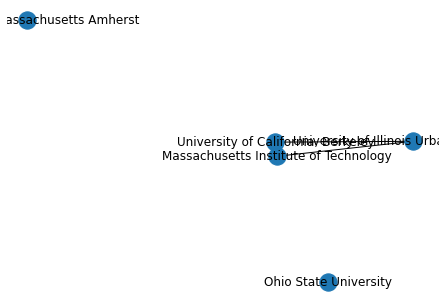

In [9]:
import os, csv
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
file_path = os.path.abspath("")

count_fig = 0

def add_node(G,node_name):
    if node_name not in G:
        G.add_node(node_name)

def add_edge_with_property(G,start_node, end_node, weight, type):
    if not G.has_edge(start_node, end_node):
        G.add_edge(start_node, end_node)
    # G.add_weighted_edges_from([(start_node, end_node, weight)])
    G[start_node][end_node][type] = weight

def add_edges_from_csv(G,name):
    with open(file_path+"/result/normal/"+name+".csv", "r") as file:
        csv_reader = csv.reader(file, delimiter=',')
        count = 0
        for line in csv_reader:
            if count == 0:
                count += 1
                continue
            add_node(G,line[0])
            add_node(G,line[1])
            add_edge_with_property(G,line[0],line[1],int(line[2]),name)

def page_rank(g, type):
    global count_fig
    count_fig += 1
    reduced_graph = g.copy()
    edges = [(u,v,d) for u,v,d in reduced_graph.edges(data=True)]
    print(type)
    for u,v,d in edges:
        if type != "general":
            weight = d.get(type,0)
        else:
            weight = d.get("edu_to_edu",0) + d.get("edu_to_work",0) + d.get("work_to_work",0)
        if not weight:
            reduced_graph.remove_edge(u,v)
        else:
            reduced_graph[u][v]["weight"] = weight
    plt.figure(count_fig)
    nx.draw(reduced_graph,with_labels=True)
    pr = nx.pagerank(reduced_graph,alpha=0.85)
    pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    return pr

def create_graph():
    G = nx.Graph()
    for name in ["edu_to_edu", "work_to_work", "edu_to_work"]:
        add_edges_from_csv(G, name)
    return G

def run_page_rank(G):
    for name in ["general", "edu_to_edu", "work_to_work", "edu_to_work"]:
        pr_result = page_rank(G, name)
        print(pr_result)
        with open(file_path+"/result/normal/page_rank_result/networkx/"+name, "w+") as output:
            output.seek(0)
            for item in pr_result:
                p = "{:3f}".format(item[1]*100)
                output.write(item[0]+","+str(p)+"\n")

def community_detection(G):
    graph = G.copy()
    with open(file_path+"/result/normal/com_detection/girvan_newman", "w+") as file:
        comp = community.girvan_newman(graph)
        comp = tuple(sorted(c) for c in next(comp))
        print(len(comp))
        for com in comp:
            for school in com:
                file.write(school+",")
            file.write("\n")
    with open(file_path+"/result/normal/com_detection/louvain", "w+") as file:
        comp = community.louvain_communities(graph, resolution=0.1)
        print(len(comp))
        print(comp)

def main():
    G = create_graph()
    run_page_rank(G)
    print(1)
    # community_detection(G)

main()

    
# print(graph[columbia][mit]["weight"])
# sample_edges = [(u,v,d) for u,v,d in G.edges(data=True) if u == "Massachusetts Institute of Technology" and v == "Massachusetts Institute of Technology"]
# for edge in sample_edges:
#     print(edge[2])






        
        
        
